In [1]:
#importing neccesary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('admission_data.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [5]:
df=df.drop("Serial No.",axis=1)

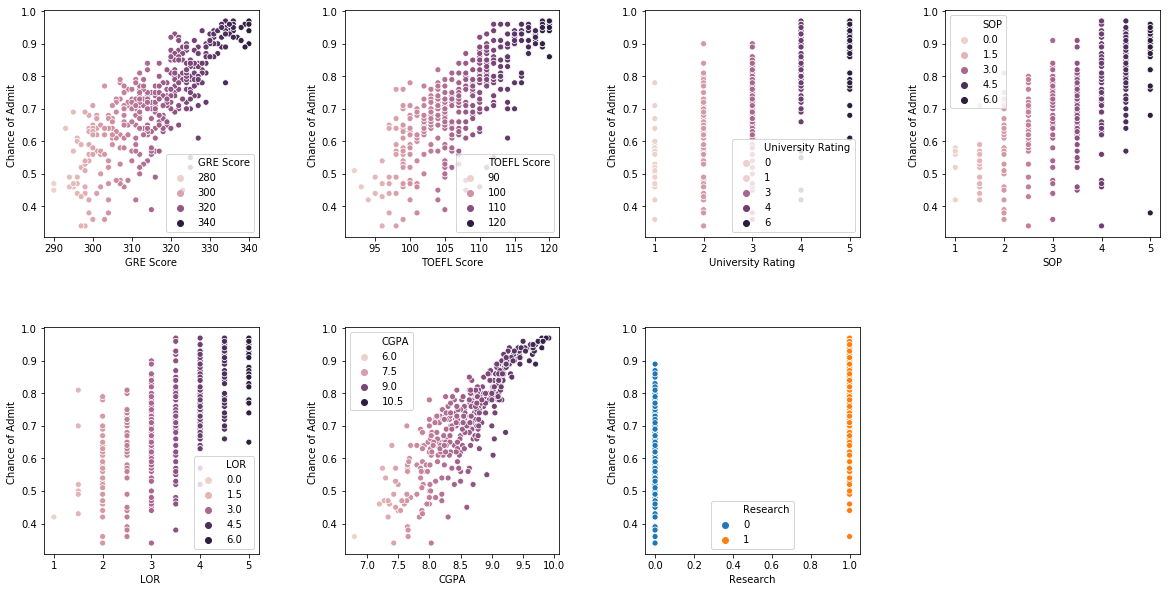

In [6]:
#plot scatter plots of Chance of Admission to each of the variables
column_names = list(df.columns)
column_names.pop(-1)
fig = plt.figure(figsize = (20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(0, len(column_names)):
    ax = fig.add_subplot(2, 4,i+1)
    sns.scatterplot(x = df[column_names[i]], y = df['Chance of Admit '], hue = df[column_names[i]] )

In [11]:
#Model Building
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [12]:
#splitting the data set
y = df['Chance of Admit ']
X = df.drop(columns = {'Chance of Admit '})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
linear_reg = LinearRegression()
Linear_regM = linear_reg.fit(X_train, y_train)

In [14]:
prediction = Linear_regM.predict(X_test)

In [15]:
prediction

array([0.76172211, 0.98184004, 0.90500797, 0.95791158, 0.78308943,
       0.90565143, 0.69146822, 0.7751641 , 0.86107061, 0.5213508 ,
       0.61975835, 0.7107175 , 0.63590244, 0.48736883, 0.65551495,
       0.66828903, 0.67543848, 0.7113172 , 0.91717664, 0.77329798,
       0.95597231, 0.73617618, 0.92355227, 0.85298752, 0.76378468,
       0.8569285 , 0.8874986 , 0.56641079, 0.89288298, 0.60261207,
       0.64454784, 0.73277465, 0.59591598, 0.52751002, 0.72145565,
       0.73461041, 0.50147221, 0.82526384, 0.7898344 , 0.74149994,
       0.83103556, 0.52420005, 0.95059824, 0.9619768 , 0.90971149,
       0.82335509, 0.63655173, 0.69569735, 0.65340049, 0.69482837,
       0.64015374, 0.86585617, 0.89699367, 0.84304544, 0.68953233,
       0.41919324, 0.6638739 , 0.80982101, 0.69126072, 0.64842481,
       0.60120918, 0.5789194 , 0.62127774, 0.70120898, 0.57215523,
       0.65968404, 0.65357155, 0.71382352, 0.85370275, 0.70038566,
       0.56756285, 0.4837203 , 0.85800467, 0.78572154, 0.80681

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
mean_squared_error(prediction, y_test)

0.002547293260312063

In [22]:
#building another model using RandomForest
rdf = RandomForestRegressor()
rdfM = rdf.fit(X_train, y_train)
rdf_prediction = rdfM.predict(X_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
mean_squared_error(rdf_prediction, y_test)

0.0033216374999999994

In [25]:
import pickle 

filename = "admission_model.sav"

pickle.dump(Linear_regM, open(filename, "wb"))